## Checkpoint 2: Regression vs. Classification

#### Assignment:
For each of the following situations, decide if you would model using a regression or classification model. Discuss your reasoning with your mentor next time you meet.


**1. The amount a person will spend on a given site in the next 24 months.**

Amount spent, which is the target variable here, is continuous (unless, of course the website is for a dollar store or only has specific prices for everything) so I would use a regression model for this example.

**2. What color car someone is going to buy.**

The target variable (car color) is categorical (there are only so many colors a car can come in, even including custom paint jobs) so I would use a classification model for this example.

**3. How many children a family will have.**

Since the target variable is not a category (there is no limit to how many children a family can have- just ask the Duggers!) I would use a regression model for this example.

**4. If someone will sign up for a service.**

The target variable (signup) is a categorical variable, so I would use a classification model for this example.


**5. The number of times someone will get sick in a year.**

Since the target variable is continuous (how many times someone gets sick in a year) I would choose to a regression for this example.


**6. The probability someone will get sick in the next month.**

Since the target variable (sick or not sick) is categorical I would choose to do a classification for this example.


**7. Which medicine will work best for a given patient.**

This is a slightly weird example, as I can see the value in doing both a classification and a regression model, depending on how we interperate the target variable (effectiveness of medicine). If we just wanted to know if the medicine worked or not I would use a classification model, but if we wanted a continuous measurement of how effective a given medicine was I would use a regression model.

## 18.5: Naive Bayes Guided Example

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [4]:
# Create an easy to access list of words commonly found in spam emails
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'enhancement', 'fast']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
# Adding the option of an all caps message to the llikelyhood of being a spam message
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [6]:
# Turns spam column into a boolean so we can do stats on it
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

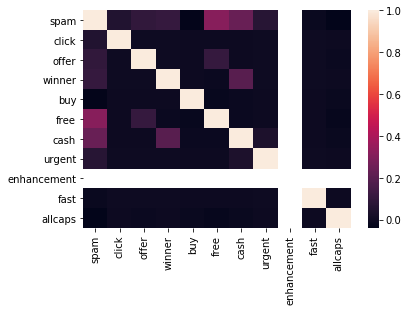

In [7]:
# This visual is a combined pandas correlation matrix and a seaborn heatmap.
sns.heatmap(sms_raw.corr())

That is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are free:offer and cash:winner. For now, let's keep everything in the dataset.

Before we actually run the model we have to build out our training data. SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). We'll do that below under the titles data and target.

In [8]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


Now try adding some of your own features and seeing if you can improve the model's performance. Also try comparing the other types of Naive Bayes Classifier and see which one is best. You can find the function names for training other kinds of Naive Bayes in the documentation. It's a one word change.

## 18.6: Challenge: Sentiment Analysis with Naive Bayes

Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

Working notes on this project:
* Trying to figure out if the review posted by the customer is positive or negative. Since this is a binary situation (either pos. or neg.) there isn't any need to create two keyword searches. I'm going to look for positive reviews based on keywords I identify after a quick look at the text file.

* Need to figure out how to make a boolean column to help do stats- like if there is a true in ANY of the keywords return a 1 so I can do stats with that column. Ideas?

In [10]:
os.getcwd()

'C:\\Users\\gothv\\Practice\\Thinkful- Assignments'

In [11]:
os.chdir('C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets\\sentiment labelled sentences\\sentiment labelled sentences')

In [12]:
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets\\sentiment labelled sentences\\sentiment labelled sentences'

In [13]:
sentiment_df = pd.read_fwf('amazon_cells_labelled.txt', delimiter= '\t', header = None)
sentiment_df.columns = ['message']


In [14]:
sentiment_df.dtypes

message    object
dtype: object

In [15]:
# Convert all messages to lowercase to better look for keywords
sentiment_df['message'] = sentiment_df['message'].str.lower()

In [16]:
# Create an easy to access list of words commonly found in positive reviews
keywords = ['excellent', 'great', 'good', 'perfect', 'nice', 'wise', 'recommended', 'love', 'better', 'comfortable', 'cool', 'happy', 'simple', 
            'tremendous', 'exactly', 'best', 'must', 'loved', 'well', 'ideal', 'highly', 'fine', 'right', 'useful', 'all', 'reasonable']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
   # sentiment_df[str(key)] = sentiment_df.message.str.contains(
    #    ' ' + str(key) + ' ',
     #   case= True
    #)
    sentiment_df[str(key)] = sentiment_df.message.str.contains(str(key), case= True)

In [17]:
sentiment_df.head()

,message,excellent,great,good,perfect,nice,wise,recommended,love,better,...,must,loved,well,ideal,highly,fine,right,useful,all,reasonable
0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.\t1",True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,great for the jawbone.\t1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the mic is great.\t1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


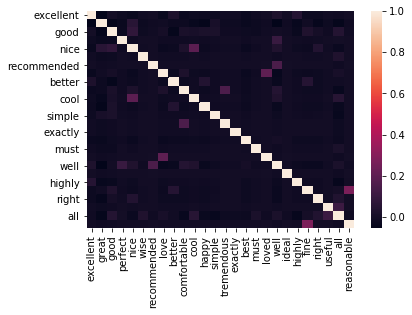

In [18]:
# This matrix sort of tells us something, but not really. Colors that are lighter have a higher correlation a.k.a. are realted more!
sns.heatmap(sentiment_df.corr());

In [19]:
# Creating dummy columns below to return a number value for each of the keywords
sentiment_df['excellent_p'] = sentiment_df.excellent.map({True: 1, False:0})
sentiment_df['great_p'] = sentiment_df.great.map({True:1, False:0})
sentiment_df['good_p'] = sentiment_df.good.map({True:1, False:0})
sentiment_df['perfect_p'] = sentiment_df.perfect.map({True:1, False:0})
sentiment_df['nice_p'] = sentiment_df.nice.map({True:1, False:0})
sentiment_df['wise_p'] = sentiment_df.wise.map({True:1, False:0})
sentiment_df['recommended_p'] = sentiment_df.recommended.map({True:1, False:0})
sentiment_df['love_p'] = sentiment_df.love.map({True:1, False:0})
sentiment_df['better_p'] = sentiment_df.better.map({True:1, False:0})
sentiment_df['comfortable_p'] = sentiment_df.comfortable.map({True:1, False:0})
sentiment_df['cool_p'] = sentiment_df.cool.map({True:1, False:0})
sentiment_df['happy_p'] = sentiment_df.happy.map({True:1, False:0})
sentiment_df['simple_p'] = sentiment_df.simple.map({True:1, False:0})
sentiment_df['tremendous_p'] = sentiment_df.tremendous.map({True:1, False:0})
sentiment_df['exactly_p'] = sentiment_df.exactly.map({True:1, False:0})
sentiment_df['best_p'] = sentiment_df.best.map({True:1, False:0})
sentiment_df['must_p'] = sentiment_df.must.map({True:1, False:0})
sentiment_df['loved_p'] = sentiment_df.loved.map({True:1, False:0})
sentiment_df['well_p'] = sentiment_df.well.map({True:1, False:0})
sentiment_df['ideal_p'] = sentiment_df.ideal.map({True:1, False:0})
sentiment_df['highly_p'] = sentiment_df.highly.map({True:1, False:0})
sentiment_df['fine_p'] = sentiment_df.fine.map({True:1, False:0})
sentiment_df['right_p'] = sentiment_df.right.map({True:1, False:0})
sentiment_df['useful_p'] = sentiment_df.useful.map({True:1, False:0})
sentiment_df['all_p'] = sentiment_df['all'].map({True:1, False:0})
sentiment_df['reasonable_p'] = sentiment_df.reasonable.map({True:1, False:0})

In [20]:
sentiment_df.head()

,message,excellent,great,good,perfect,nice,wise,recommended,love,better,...,must_p,loved_p,well_p,ideal_p,highly_p,fine_p,right_p,useful_p,all_p,reasonable_p
0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,"good case, excellent value.\t1",True,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,great for the jawbone.\t1,False,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,the mic is great.\t1,False,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [21]:
positive = sentiment_df[keywords].sum(axis = 1)

In [22]:
sentiment_df['positive']= positive

In [23]:
data = sentiment_df[keywords]
target = sentiment_df['positive']

In [24]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 87


In [25]:
# Let's import another dataset in this project and see if there is any overlap in my model!
yelp_sentiment_df = pd.read_fwf('yelp_labelled.txt', delimiter= '\t', header = None)
yelp_sentiment_df.columns = ['message', 'positive']

In [26]:
keywords = ['excellent', 'great', 'good', 'perfect', 'nice', 'wise', 'recommended', 'love', 'better', 'comfortable', 'cool', 'happy', 'simple', 
            'tremendous', 'exactly', 'best', 'must', 'loved', 'well', 'ideal', 'highly', 'fine', 'right', 'useful', 'all', 'reasonable']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
   # sentiment_df[str(key)] = sentiment_df.message.str.contains(
    #    ' ' + str(key) + ' ',
     #   case= True
    #)
    yelp_sentiment_df[str(key)] = yelp_sentiment_df.message.str.contains(str(key), case= True)

In [27]:
yelp_sentiment_df['excellent_p'] = yelp_sentiment_df.excellent.map({True: 1, False:0})
yelp_sentiment_df['great_p'] = yelp_sentiment_df.great.map({True:1, False:0})
yelp_sentiment_df['good_p'] = yelp_sentiment_df.good.map({True:1, False:0})
yelp_sentiment_df['perfect_p'] = yelp_sentiment_df.perfect.map({True:1, False:0})
yelp_sentiment_df['nice_p'] = yelp_sentiment_df.nice.map({True:1, False:0})
yelp_sentiment_df['wise_p'] = yelp_sentiment_df.wise.map({True:1, False:0})
yelp_sentiment_df['recommended_p'] = yelp_sentiment_df.recommended.map({True:1, False:0})
yelp_sentiment_df['love_p'] = yelp_sentiment_df.love.map({True:1, False:0})
yelp_sentiment_df['better_p'] = yelp_sentiment_df.better.map({True:1, False:0})
yelp_sentiment_df['comfortable_p'] = yelp_sentiment_df.comfortable.map({True:1, False:0})
yelp_sentiment_df['cool_p'] = yelp_sentiment_df.cool.map({True:1, False:0})
yelp_sentiment_df['happy_p'] = yelp_sentiment_df.happy.map({True:1, False:0})
yelp_sentiment_df['simple_p'] = yelp_sentiment_df.simple.map({True:1, False:0})
yelp_sentiment_df['tremendous_p'] = yelp_sentiment_df.tremendous.map({True:1, False:0})
yelp_sentiment_df['exactly_p'] = yelp_sentiment_df.exactly.map({True:1, False:0})
yelp_sentiment_df['best_p'] = yelp_sentiment_df.best.map({True:1, False:0})
yelp_sentiment_df['must_p'] = yelp_sentiment_df.must.map({True:1, False:0})
yelp_sentiment_df['loved_p'] = yelp_sentiment_df.loved.map({True:1, False:0})
yelp_sentiment_df['well_p'] = yelp_sentiment_df.well.map({True:1, False:0})
yelp_sentiment_df['ideal_p'] = yelp_sentiment_df.ideal.map({True:1, False:0})
yelp_sentiment_df['highly_p'] = yelp_sentiment_df.highly.map({True:1, False:0})
yelp_sentiment_df['fine_p'] = yelp_sentiment_df.fine.map({True:1, False:0})
yelp_sentiment_df['right_p'] = yelp_sentiment_df.right.map({True:1, False:0})
yelp_sentiment_df['useful_p'] = yelp_sentiment_df.useful.map({True:1, False:0})
yelp_sentiment_df['all_p'] = yelp_sentiment_df['all'].map({True:1, False:0})
yelp_sentiment_df['reasonable_p'] = yelp_sentiment_df.reasonable.map({True:1, False:0})

In [28]:
positive = yelp_sentiment_df[keywords].sum(axis = 1)

In [29]:
(yelp_sentiment_df['positive'])= positive

In [30]:
data = yelp_sentiment_df[keywords]
target = yelp_sentiment_df['positive']

In [31]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 70


In [32]:
((1000-70)/10)

93.0

## Challenge Write-Up

For this challenge I decided to pick comments that had a "positive" sentiment, as it was easier to idenfity repeated positive words in the comments. I went through the first 20 comments to see if there were any repeating "positive" words that I could use as features. I then created a keyword list of these positive words and ran them through my model to see if it would identify them. According to my evaluation methods I had 87 out of 1,000 points mislabeled, giving my model an accuracy of around 91%. This seems like a decent number so I decided to try the same keywords on one of the other datasets provided in this assignment, the Yelp review file. I used the exact same positive keywords, which was a bit difficult since the reviews in both files are for completely different situations: the Amazon file is a review of a product and the Yelp file is a review of a place. Despite the differences there were still overlapping positive keywords and my model had an accuracy of around 93% with the second data set.

## 18.7: Accuracy and Error Types

In [33]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [34]:
# Calculate the accuracy of your model here.
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


In [35]:
# Calculate the accuracy of your model here:
remaining= (5572- 604)
print(remaining/5572*100)

89.16008614501077


In [36]:
print(remaining)

4968


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

### DRILL:
It's worth calculating these with code so that you fully understand how these statistics work, so here is your task for the cell below. Manually generate (meaning don't use the SKLearn function) your own confusion matrix and print it along with the sensitivity and specificity.

In [38]:
# Build your confusion matrix and calculate sensitivity and specificity here.

# We have 5572 data points in this model. 604 of them are incorrectly classified. According to our notes we know 549 were false negative,
# and 55 points were false positive. ("Correctly" labeled points = 4,968 )
totalpts= 5572

# Calculations for false negatives (target # is 549)
false_neg= 549 
# Calculations for false positives (target # is 55)
false_pos = 55
# Calculations for sensitivity (true positives)
sensitivity = (198/747)
# Calculation for specificity (true negatives)
specificity= (4770/4825)

## 18.9: In-Sample Evaluation and Cross-Validation

In [39]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [40]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [41]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

## 18.10: Challenge- Implement Your Own Sentiment Classifier

This assignment is in another Jupyter notebook that I have shared the link to in my assignment page.